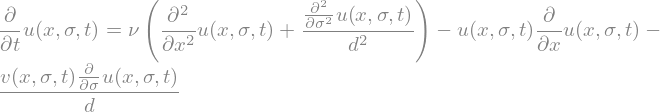

In [66]:
import sympy as sp

# Initialize LaTeX printing
sp.init_printing(use_latex=True)

# Define the symbols
x, y, t = sp.symbols('x y t')
nu = sp.symbols('nu')
sigma_symbol = sp.symbols('sigma')
d_symbol = sp.symbols('d')
f_symbol = sp.symbols('f')

# Define h and eta
#h = sp.Function('h')(x, t)
#eta = sp.Function('eta')(x, t)
h = sp.symbols('h')
eta = 0

# Define sigma from y, h, and eta
sigma = (y + h) / (eta + h)

# Define functions
u = sp.Function('u')(x, sigma, t)
v = sp.Function('v')(x, sigma, t)
p = sp.Function('p')(x, sigma, t)

velocity = sp.Matrix([u, v])

# Make gradient operator
def grad(f):
    return sp.Matrix([f.diff(x), f.diff(y)])

def laplacian(f):
    return f.diff(x, 2) + f.diff(y, 2)

part_1 = laplacian(u)
part_2 = velocity.dot(grad(u))

# Combine results
result = sp.Eq(u.diff(t), nu * part_1 - part_2)
#result = result.simplify()

result = result.subs((y + h) / (eta + h), sigma_symbol)
result = result.subs((eta + h), d_symbol)
#result = result.subs(sp.Derivative(eta,x) + sp.Derivative(h,x),f_symbol)

display(result.doit())
